# Value of Energy Cost Saving Program 

In [1]:
import pandas as pd
import numpy as np

In [2]:
energy_cost_saving =pd.read_csv("//ValueofEnergyCostSavingsProgramSavingsforBusinessesFY2020.csv")
energy_cost_saving.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [3]:
energy_cost_saving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [4]:
#1- How many different companies are represented in the data set?
energy_cost_saving['Company Name'].nunique()

439

In [5]:
#2- What is the total number of jobs created for businesses in Queens?
energy_cost_saving.groupby('Borough').agg({'Job created': 'sum'})

,Job created
Borough,
Bronx,22.0
Brooklyn,25.0
New York,0.0
Queens,102.0
Staten Island,0.0


In [6]:
# 3- How many different unique email domains names are there in the data set?
energy_cost_saving['domain'] = energy_cost_saving['company email'].apply(lambda email: email.split('@')[1] 
                                                                         if pd.notna(email) and '@'in email else email)
energy_cost_saving['domain'].nunique()

361

In [7]:
#4-Considering only NTAs with at least 5 listed businesses, 
# what is the average total savings and the total jobs created for each NTA?
NTA_all = energy_cost_saving.groupby('NTA').agg({"Company Name": "count", 
                                                 "Total Savings": "mean", 
                                                 "Job created": "sum"})
NTA_over5 = NTA_all[NTA_all['Company Name']>=5]
NTA_over5

,Company Name,Total Savings,Job created
NTA,,,
Battery Park City-Lower Manhattan,9,469890.796667,0.0
Bushwick South,10,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
College Point,7,17159.372857,2.0
Crown Heights North,9,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,59950.340000,0.0
East New York,9,48433.093333,15.0
East Williamsburg,11,13990.626364,0.0
Greenpoint,14,9753.649286,0.0


In [8]:
# 5-Save your result for the previous question as a CSV file.
NTA_over5.to_csv('ave_total_saving_and_total_job_for_each_NTA.csv')

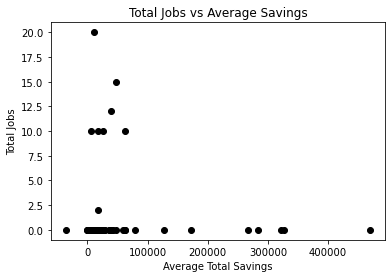

In [11]:
#1-scatter plot of jobs created versus average savings. 
#1A-a standard scale for the average savings
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(NTA_all['Total Savings'], NTA_all['Job created'],color= 'black')
ax.set_ylabel('Total Jobs')
ax.set_xlabel('Average Total Savings')
ax.set_title('Total Jobs vs Average Savings')
plt.show()

/Users/serifeakkurt/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


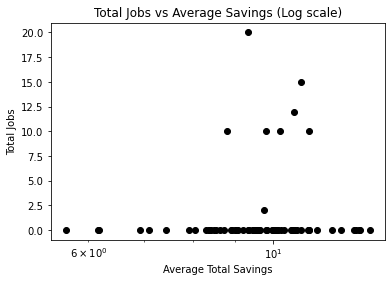

In [12]:
#1B-a logarithmic scale for the average savings

log_of_TotalSaving = np.log(NTA_all['Total Savings'])

fig, ax = plt.subplots()
ax.scatter(log_of_TotalSaving, NTA_all["Job created"], color='black')
ax.set_ylabel('Total Jobs')
ax.set_xlabel('Average Total Savings')
ax.set_title('Total Jobs vs Average Savings (Log scale)')
ax.set_xscale("log")
plt.show()

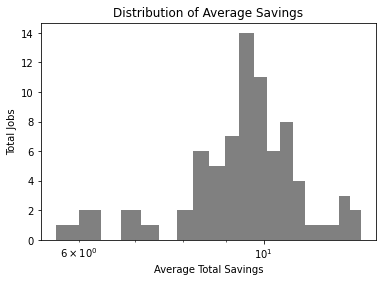

In [13]:
# 2- histogram of the log of the average total savings

fig, ax = plt.subplots()

ax.hist(log_of_TotalSaving, bins=20, color='gray')
ax.set_xscale("log")
ax.set_xlabel('Average Total Savings')
ax.set_ylabel('Total Jobs')
ax.set_title('Distribution of Average Savings')
plt.show()

In [14]:
# 3- line plot of the total jobs created for each month

energy_cost_saving['Effective Date'] = pd.to_datetime(energy_cost_saving['Effective Date'])

energy_cost_saving['Year'] = energy_cost_saving['Effective Date'].dt.year
energy_cost_saving['Month'] = energy_cost_saving['Effective Date'].dt.month
energy_cost_saving['Day']= energy_cost_saving['Effective Date'].dt.day

total_jobs_eachmon = energy_cost_saving.groupby(['Month'])['Job created'].sum()
total_jobs_eachmon

Month
1      0.0
2     27.0
3     20.0
4      2.0
5      2.0
6     63.0
7     20.0
8      0.0
9      0.0
10     0.0
11     5.0
12    10.0
Name: Job created, dtype: float64

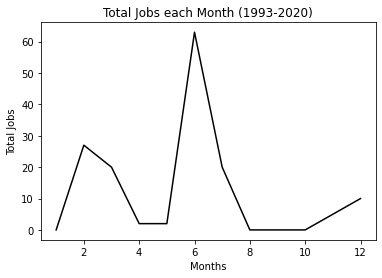

In [15]:
fig, ax = plt.subplots()
ax.plot(total_jobs_eachmon, color='black')
ax.set_xlabel('Months')
ax.set_ylabel('Total Jobs')
ax.set_title('Total Jobs each Month (1993-2020)')
plt.show()